# Description on this notebook

* This notebook is mainly for exploring the datasets and applying various algorithmn to find which of those predicted most accurate.
* The actual modelling notebook is : https://www.kaggle.com/samuelwy/machine-learning/notebook
* This notebook analyse every features ( univariate, bivariate and multivariate analysis )

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# Import libraries

In [2]:
import seaborn as sns
print('Seaborn version : {}'.format(sns.__version__))
import matplotlib.pyplot as plt
plt.style.use('ggplot')
print('Pandas version : {}'.format(pd.__version__))
print('Numpy version : {}'.format(np.__version__))
print('Matplotlib version : {}'.format(None))
plt.style.use('ggplot')


Seaborn version : 0.10.0
Pandas version : 1.0.3
Numpy version : 1.18.1
Matplotlib version : None


**Color palette**

In [3]:
sns.set_palette('Pastel2')

# Read training data and testing data

In [4]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

print('Train data import sucessfully. : df_train')
print('Test data import sucessfully. : df_test')

train = df_train.copy()
test = df_test.copy()

print('Copy of Train data created sucessfully. : train')
print('Copy of Test data created sucessfully. : test')

Train data import sucessfully. : df_train
Test data import sucessfully. : df_test
Copy of Train data created sucessfully. : train
Copy of Test data created sucessfully. : test


# Description of the features

**Features details**
* survival : Survival	0 = No, 1 = Yes
* pclass : Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* sex	: Sex	
* Age	: Age in years	
* sibsp	: # of siblings / spouses aboard the Titanic	
* parch	: # of parents / children aboard the Titanic	
* ticket	: Ticket number	
* fare	: Passenger fare	
* cabin	: Cabin number	
* embarked	: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes**
* pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

# Train & test data exploring

In [5]:
print('Train data : {}'.format(train.shape))
print('Test data : {}'.format(test.shape))

Train data : (891, 12)
Test data : (418, 11)


**Train dataset info**

In [6]:
print(train.info(),'\n')
print(train.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486

**Test data info**

In [7]:
print(test.info(),'\n')
print(test.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None 

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209

In [8]:
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [9]:
test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

**Summary**
* Survived which is the target feature not in the test data
* Passenger ID and Ticket is a column which will not assits in our model and can be drop.
* We can extract the title of the passengers from the Name column

# Hypothesis to be verified

**Main Question**
Who will survived in the Titanic tragedy ?

**Question**
1. What is the survival rate of the tragedy?
2. Who is more likely to survived?
3. What will affect the survival rate?

**Assumption**
* Female is more likely to survived
* Children and Senior cititzen are likely to survived
* Passenger from ticket class 1 are more likely to survived
* Passenger with Royal or noble title are more likely to survived

# Check for missing values

In [10]:
train_na = train.isnull().sum()
test_na = test.isnull().sum()

print('Missing value\'s count for each column from train and test data :')
print(pd.concat([train_na, test_na], axis = 1, keys=['Train', 'Test']))

Missing value's count for each column from train and test data :
             Train   Test
PassengerId      0    0.0
Survived         0    NaN
Pclass           0    0.0
Name             0    0.0
Sex              0    0.0
Age            177   86.0
SibSp            0    0.0
Parch            0    0.0
Ticket           0    0.0
Fare             0    1.0
Cabin          687  327.0
Embarked         2    0.0


* Columns ( age,fare,cabin, embarked ) have missing values.
* Cabin has the most missing values


In [11]:
print('Unique values for Categorical features :','\n')

print('Train')
for col in train.drop(['PassengerId', 'Name','Age', 'Ticket', 'Fare', 'Cabin'],axis = 1):
    print(col + ' : {}'.format(train[col].unique()))
print('\n')    
print('Test')
for col in test.drop(['PassengerId', 'Name','Age', 'Ticket', 'Fare', 'Cabin'],axis = 1):
    print(col + ' : {}'.format(test[col].unique()))

Unique values for Categorical features : 

Train
Survived : [0 1]
Pclass : [3 1 2]
Sex : ['male' 'female']
SibSp : [1 0 3 4 2 5 8]
Parch : [0 1 2 5 3 4 6]
Embarked : ['S' 'C' 'Q' nan]


Test
Pclass : [3 2 1]
Sex : ['male' 'female']
SibSp : [0 1 2 3 4 5 8]
Parch : [0 1 3 2 4 6 5 9]
Embarked : ['Q' 'S' 'C']


In [12]:
from pandas_profiling import ProfileReport

In [13]:
ProfileReport(train, title="Pandas Profiling Report")

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# EDA

**Main problem :**
Who will be more likely to survived in the tragedy?

**Assumption :**
* Passengers with higher age 
* Children
* Female
* Female that are elderly
* Passengers with royal title
* Class 1
* Higher fare
* Cabin that are in lower deck
* Fare that is more than median

In [14]:
train.Survived.unique()

array([0, 1])

# Functions that are mostly used

In [15]:
def univariate_countplot(data, x,xlabel,ylabel = 'No. of Passengers',title = '',fontsize = 14, legend = '',label = '',ax = None):
    '''Plot countplot for a single variable.'''
    sns.countplot(data = data, x = x,ax = ax)
    plt.title(title, fontsize = fontsize)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

def univariate_count(on, norm = False):
    '''Print the Pmf for one variable.'''
    print('Proportion of {} :'.format(on))
    print(train[on].value_counts(normalize = norm ).sort_index())
    
def bivariate_countplot(data, x,hue,xlabel,ylabel,title,legend = '',label = '',ax = ''):
    '''Plot countplot for a single variable with hue as second variable.'''
    sns.countplot(data = train, x = x, hue = hue, ax=ax)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize = 14)
    if legend == True:
        plt.legend(loc = 'best',labels = label, title = hue)

    
def bivariate_groupby(by,on,normalize):
    '''Print the Pmf for two variable.'''
    print('Proportion of {} by {} :'.format(by,on))
    print(train.groupby(by)[on].value_counts(normalize = normalize).sort_index())

# EDA

**Survival ( Target feature )**

Survival rate of the overall

In [16]:
print('Survival rate :')
print(train.Survived.value_counts(normalize=True))

Survival rate :
0    0.616162
1    0.383838
Name: Survived, dtype: float64


([<matplotlib.axis.YTick at 0x7f8af2908390>,
 <a list of 12 Text major ticklabel objects>)

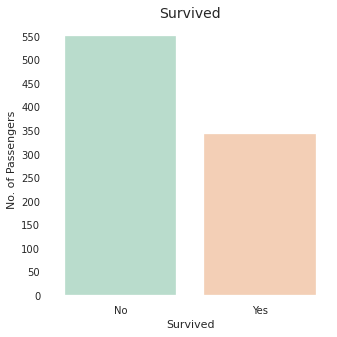

In [17]:
fig,ax = plt.subplots(figsize = (5,5))

univariate_countplot(train,'Survived','Survived',ylabel = 'No. of Passengers',title = 'Survived',fontsize = 14, legend = '',label = '',ax = ax)
plt.xticks([0,1], ['No','Yes'])
plt.yticks(np.arange(0,600,50))

* Survival rate is 38.3% ( around 350 passengers )
* Most of the people did not survive in the tragedy.

 **Pclass**
 
 No. of passengers for each ticket class

In [18]:
univariate_count('Pclass', True)

Proportion of Pclass :
1    0.242424
2    0.206510
3    0.551066
Name: Pclass, dtype: float64


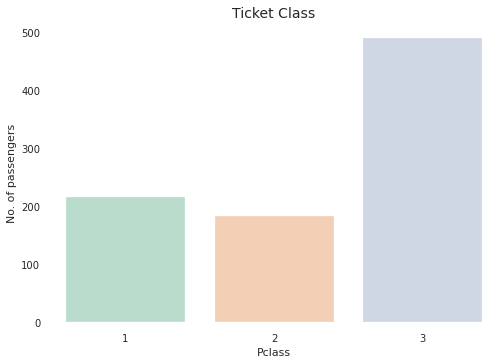

In [19]:
fig,ax = plt.subplots()
univariate_countplot(train,'Pclass','Pclass', 'No. of passengers', 'Ticket Class',ax=ax)

* Ticket class 3 has the highest no. of passengers with almost 500 of it and a difference of 300 compare to 1, 2.

In [20]:
bivariate_groupby('Pclass','Survived', True)

Proportion of Pclass by Survived :
Pclass  Survived
1       0           0.370370
        1           0.629630
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64


* Pclass 1 has the highest survival rate which is 63%
* Pclass 3 has the highest death rate which is 75.7% 
* We can see that the assumption of ticket class 1 has the highest survival rate compare to class 2 and 3

In [21]:
bivariate_groupby(['Pclass','Sex'],'Survived', True)

Proportion of ['Pclass', 'Sex'] by Survived :
Pclass  Sex     Survived
1       female  0           0.031915
                1           0.968085
        male    0           0.631148
                1           0.368852
2       female  0           0.078947
                1           0.921053
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64


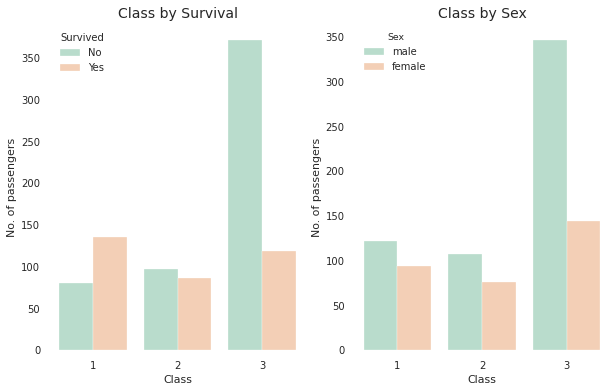

In [22]:
fig = plt.figure(figsize = (10,6))

ax1 = fig.add_subplot(121)
bivariate_countplot(train,'Pclass', 'Survived','Class', 'No. of passengers','Class by Survival',True, ['No','Yes'],ax1)

ax2 = fig.add_subplot(122)
bivariate_countplot(train,'Pclass', 'Sex','Class', 'No. of passengers','Class by Sex',ax=ax2)

We can see that the for all 3 class the male passengers is relatively higher.

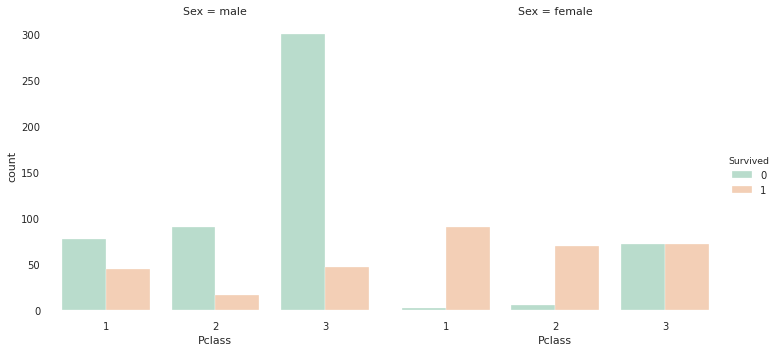

In [23]:
g = sns.catplot(data = train, x = 'Pclass', hue = 'Survived',col = 'Sex', kind = 'count')

* All Ticket class for male has a high death count compare to survived
* All Ticket class for female has a very high survival count with almost zero death count for class 1 2

* we can say that regardless of the class, the death rate of male is higher than female

**Name**

Extract the title from the name column

In [24]:
train['Title'] = train.Name.apply(lambda x : x.split(',')[1].split('.')[0].strip())

def title_type(row):
    if row in ['Don', 'Mme',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer','Dona','Dr','Rev']:
        # label as rare for titles that are low in counts
        return 'Rare'
    elif row == 'Miss':
        return 'Ms'
    else:
        return row
    
train['Title'] = train.Title.apply(title_type)

In [25]:
print('Proportion of Title :')
print(train.Title.value_counts(normalize = True).sort_values(ascending = False))

Proportion of Title :
Mr        0.580247
Ms        0.205387
Mrs       0.140292
Master    0.044893
Rare      0.029181
Name: Title, dtype: float64


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

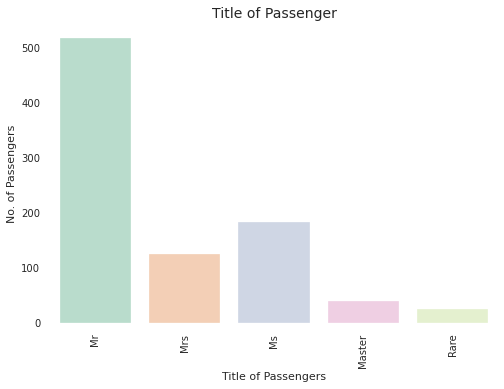

In [26]:
fig,ax = plt.subplots()
univariate_countplot(train, 'Title','Title of Passengers', title = 'Title of Passenger',ax=ax )
plt.xticks(rotation = 90)

We can see that most of passengers are Mr and very less passengers has a title 'Rare'

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

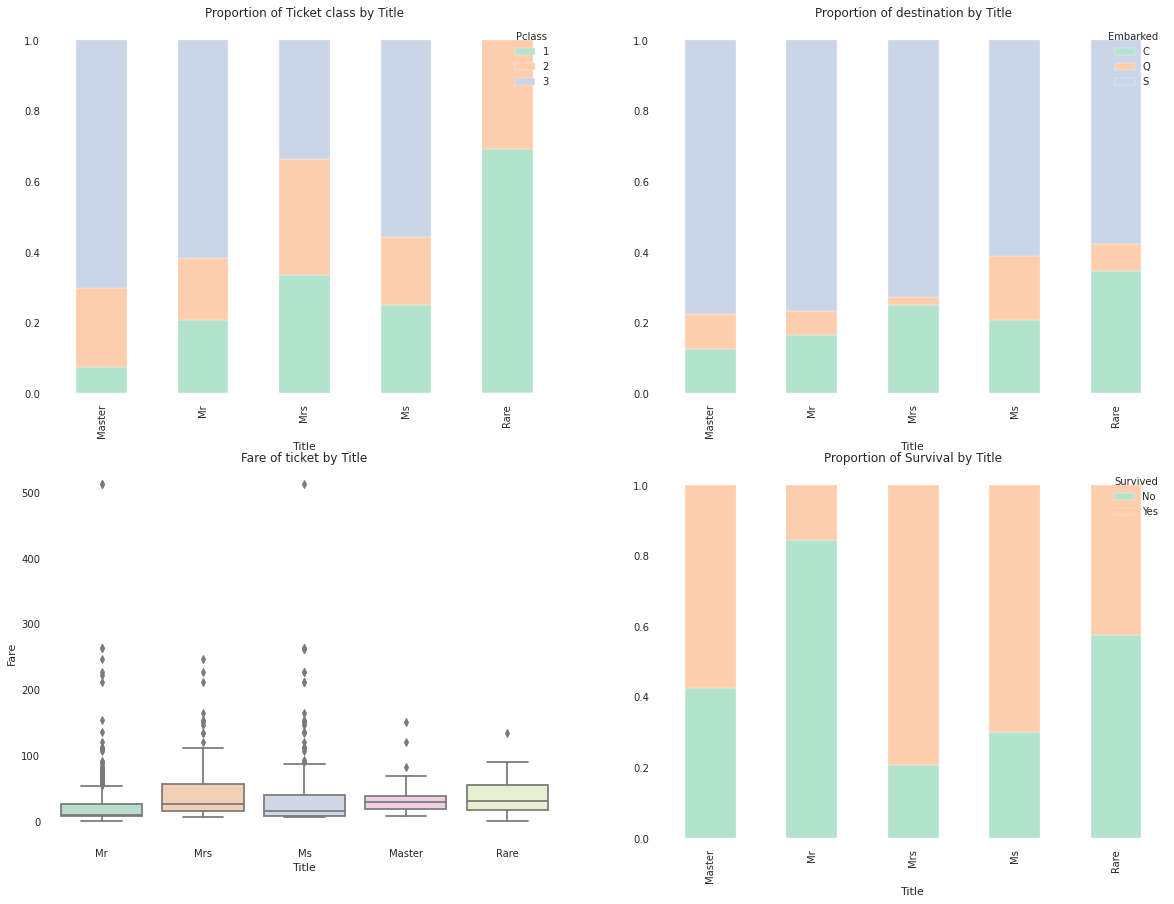

In [27]:
fig =plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(221)
train.groupby('Title')['Pclass'].value_counts(normalize = True).unstack().plot(kind = 'bar', stacked = True,ax=ax1)
ax1.set(title = 'Proportion of Ticket class by Title')

ax2 = fig.add_subplot(222)
train.groupby('Title')['Embarked'].value_counts(normalize = True).unstack().plot(kind = 'bar', stacked = True,ax=ax2)
ax2.set(title = 'Proportion of destination by Title')

ax3 = fig.add_subplot(223)
sns.boxplot(data = train, x = 'Title', y = 'Fare',ax=ax3)
ax3.set(title = 'Fare of ticket by Title')

ax4 = fig.add_subplot(224)
train.groupby('Title')['Survived'].value_counts(normalize = True).unstack().plot(kind = 'bar', stacked = True,ax=ax4)
ax4.set(title = 'Proportion of Survival by Title')
plt.legend(title = 'Survived', labels = ['No','Yes'])

plt.xticks(rotation = 90)

* The top 3 title of passengers are Mr, Ms, Master where Mr has around 72%.
* Most of the title Rare are in class 1 
* Most of passengers that have a known title are in class 1
* Most of the master title's passenger are in class 3 ( > 60% )
* Most of the passenger are going to embarked at Southampton
* Passengers with title Mrs and Ms are likely to survived

**Sex**

In [28]:
univariate_count('Sex',True)

Proportion of Sex :
female    0.352413
male      0.647587
Name: Sex, dtype: float64


In [29]:
bivariate_groupby('Sex', 'Survived', True)

Proportion of Sex by Survived :
Sex     Survived
female  0           0.257962
        1           0.742038
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64


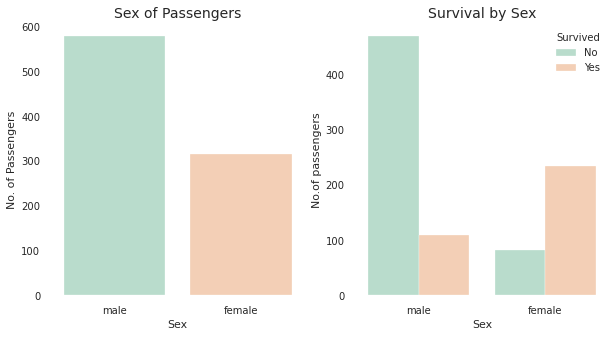

In [30]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(121)
univariate_countplot(train,'Sex',xlabel = 'Sex', title = 'Sex of Passengers', ax=ax1)

ax2 = fig.add_subplot(122)
bivariate_countplot(train,'Sex','Survived','Sex', 'No.of passengers', 'Survival by Sex', True, ['No','Yes'],ax=ax2)

We can conclude that the hypothesis male are less likely to survive and female or more lightly to survived

**Age**

In [31]:
univariate_count('Age',True)

Proportion of Age :
0.42     0.001401
0.67     0.001401
0.75     0.002801
0.83     0.002801
0.92     0.001401
           ...   
70.00    0.002801
70.50    0.001401
71.00    0.002801
74.00    0.001401
80.00    0.001401
Name: Age, Length: 88, dtype: float64


In [32]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [33]:
# explore min and max age
train[(train.Age == train.Age.max()) | (train.Age == train.Age.min())]

PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
803          804         1       3       Thomas, Master. Assad Alexander   

      Sex    Age  SibSp  Parch Ticket     Fare Cabin Embarked   Title  
630  male  80.00      0      0  27042  30.0000   A23        S      Mr  
803  male   0.42      0      1   2625   8.5167   NaN        C  Master

Master is a title for an underage male

Testing normality

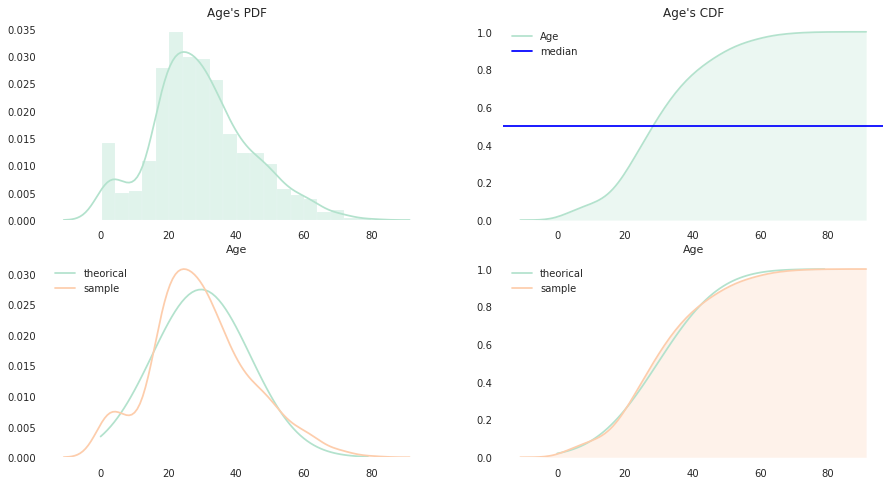

In [34]:
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(221)
sns.distplot(train['Age'],ax=ax1)
ax1.set(title = 'Age\'s PDF')

ax2 = fig.add_subplot(222)
sns.kdeplot(train.Age, cumulative = True, shade = True,ax=ax2)
ax2.set(title = 'Age\'s CDF',xlabel = 'Age')
ax2.axhline(0.5, color = 'b', label = 'median')
plt.legend()

ax3 = fig.add_subplot(223)
from scipy.stats import norm
x = np.arange(0,80)
y = norm(train.Age.mean(), train.Age.std()).pdf(x)
ax3.plot(x,y, label = 'theorical')
sns.kdeplot(train['Age'],ax=ax3, label = 'sample')
plt.legend(loc = 'upper left')

ax4 = fig.add_subplot(224)
y = norm(train.Age.mean(), train.Age.std()).cdf(x)
ax4.plot(x,y,label = 'theorical')
sns.kdeplot(train.Age, cumulative = True, shade = True,ax=ax4, label = 'sample')
plt.legend()

In [35]:
# Children , adult and senior citizens
def age_diff(row):
    if row < 18:
        return 'Child'
    elif (row < 60) & (row >=18):
        return 'Adult'
    else:
        return 'Elderly'

train['Age_cat'] = train.Age.apply(age_diff)

In [36]:
univariate_count('Age_cat',True)

Proportion of Age_cat :
Adult      0.645342
Child      0.126824
Elderly    0.227834
Name: Age_cat, dtype: float64


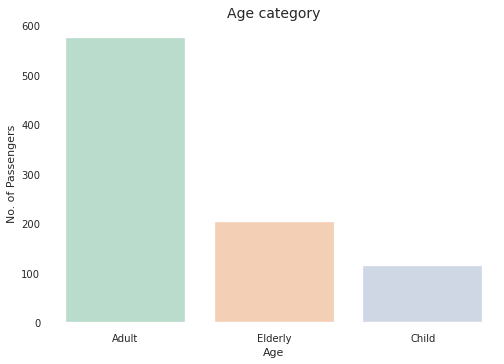

In [37]:
fig,ax = plt.subplots()
univariate_countplot(train,'Age_cat','Age',title = 'Age category', ax=ax)

We can see that most of the passengers are adult and children is the lowest in count.

**Multivariate**

[Text(0.5, 1.0, 'Age by class')]

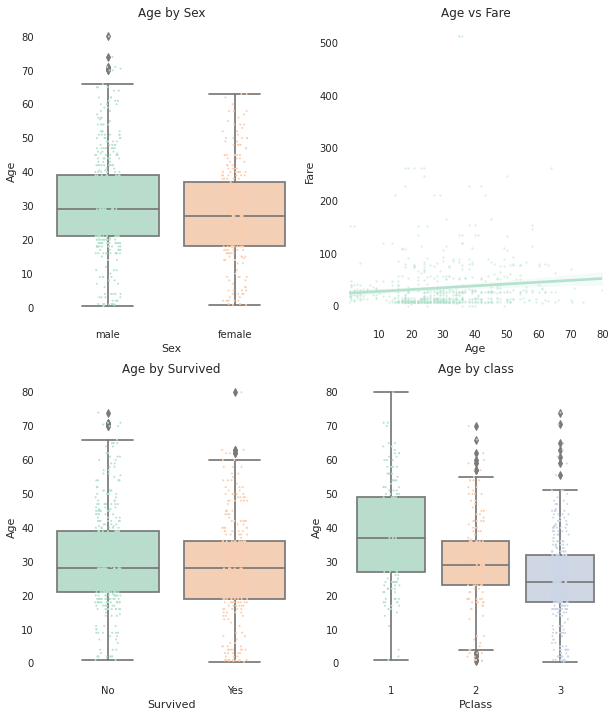

In [38]:
fig = plt.figure(figsize = (10,12))
ax1 = fig.add_subplot(221)
sns.boxplot(data = train, x = 'Sex', y = 'Age',ax=ax1)
sns.stripplot(data = train, x = 'Sex', y = 'Age',ax=ax1,size = 2)
ax1.set(title = 'Age by Sex')

ax2 = fig.add_subplot(222)
sns.regplot(data = train, x = 'Age', y = 'Fare',ax=ax2,scatter_kws = {'alpha':0.5, 's' : 5})
ax2.set(title = 'Age vs Fare')

ax3 = fig.add_subplot(223)
sns.boxplot(data = train, x = 'Survived', y = 'Age',ax=ax3)
sns.stripplot(data = train, x = 'Survived', y = 'Age',ax=ax3,size = 2)
ax3.set(title = 'Age by Survived')
plt.xticks([0,1], ['No','Yes'])

ax4 = fig.add_subplot(224)
sns.boxplot(data = train, x = 'Pclass', y = 'Age',ax=ax4)
sns.stripplot(data = train, x = 'Pclass', y = 'Age',ax=ax4,size = 2)
ax4.set(title = 'Age by class')


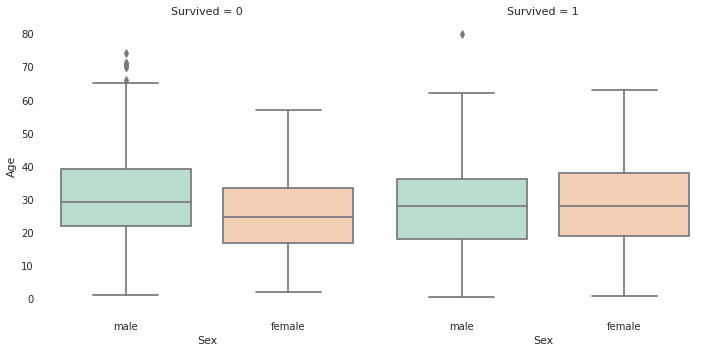

In [39]:
sns.catplot(data = train, x = 'Sex', y = 'Age', col = 'Survived', kind = 'box')

* Most of the passengers are Adult (65%) and lesser is children (13%)
* most of the passenger is around age 18 to 30+
* median age is 28 and mean is around age 30 
* max age is 80 and min age is 0.42
* for the age 0.42 passenger, we can conclude that he is a child and not entry error because it has 1 parents onboard with him and title Master which indicates he was an underage male.
* for age 80 passenger, we can believe that it is reasonable because age 80 is consider veteren and is possible to on board on the ship.

Is Age comes from a normal distribution?
* according to the pdf of Age, we hard to compare the age distribution to a theorical normal distribution 
* but if we looks at its cdf, we can see that both distribution is smiliar and we can temproary conclude that age cames from a normal distirbution but need to do further inferential analysis

* The age of male are significant higher than female
* the age of passengers in class 3 are lower than others

**Siblings and Spouse**

In [40]:
univariate_count('SibSp', True)

Proportion of SibSp :
0    0.682379
1    0.234568
2    0.031425
3    0.017957
4    0.020202
5    0.005612
8    0.007856
Name: SibSp, dtype: float64


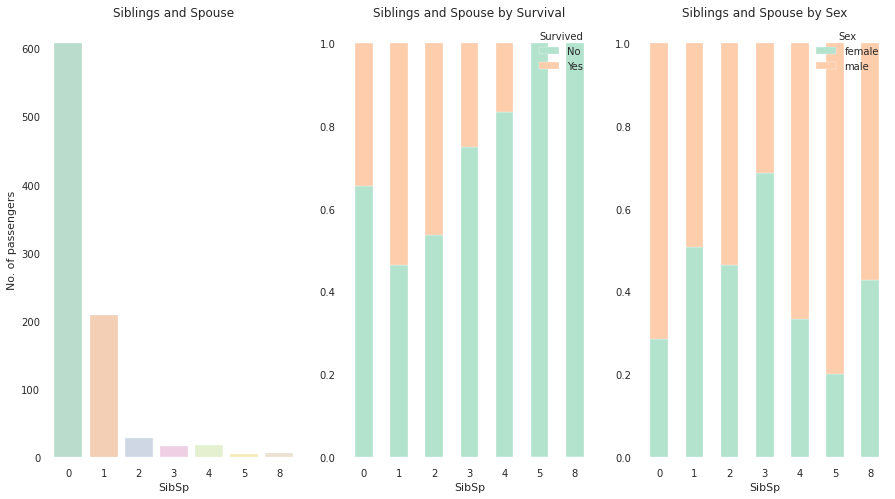

In [41]:
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(131)

sns.countplot(data = train, x = 'SibSp',ax=ax1)
ax1.set(title='Siblings and Spouse', ylabel = 'No. of passengers')

ax2 = fig.add_subplot(132)
train.groupby('SibSp')['Survived'].value_counts(normalize = True).unstack().plot(kind = 'bar', stacked = True,ax=ax2)
ax2.set(title = 'Siblings and Spouse by Survival')
plt.xticks(rotation = False)
plt.legend(loc = 'upper right', title = 'Survived', labels = ['No','Yes'])

ax3 = fig.add_subplot(133)
train.groupby('SibSp')['Sex'].value_counts(normalize = True).unstack().plot(kind = 'bar', stacked = True,ax=ax3)
ax3.set(title = 'Siblings and Spouse by Sex')
plt.xticks(rotation = False)
plt.legend(loc = 'upper right', title = 'Sex')

* Most of the passengers did not have any siblings and spouse onboard in the ship (68%)
* the 2nd is with 1 spouse or siblings with them onboard (23%)

**Parch**

In [42]:
univariate_count('Parch', True)

Proportion of Parch :
0    0.760943
1    0.132435
2    0.089787
3    0.005612
4    0.004489
5    0.005612
6    0.001122
Name: Parch, dtype: float64


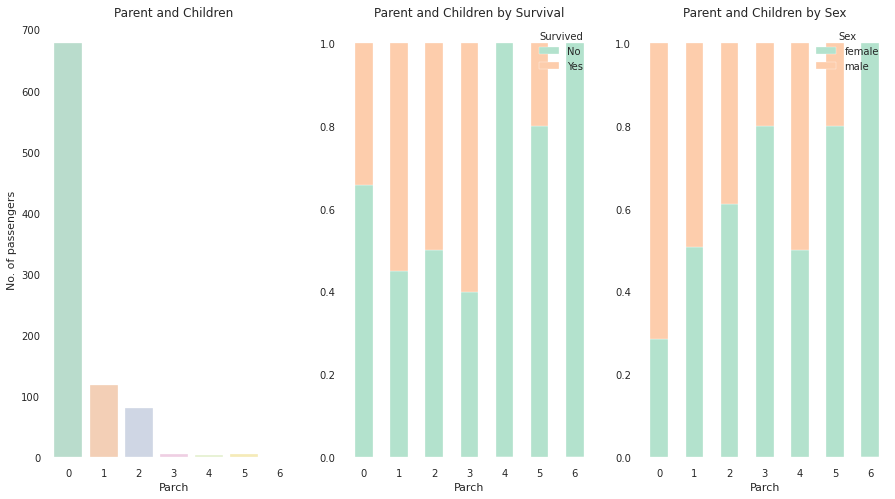

In [43]:
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(131)

sns.countplot(data = train, x = 'Parch',ax=ax1)
ax1.set(title='Parent and Children', ylabel = 'No. of passengers')

ax2 = fig.add_subplot(132)
train.groupby('Parch')['Survived'].value_counts(normalize = True).unstack().plot(kind = 'bar', stacked = True,ax=ax2)
ax2.set(title = 'Parent and Children by Survival')
plt.xticks(rotation = False)
plt.legend(loc = 'upper right', title = 'Survived', labels = ['No','Yes'])

ax3 = fig.add_subplot(133)
train.groupby('Parch')['Sex'].value_counts(normalize = True).unstack().plot(kind = 'bar', stacked = True,ax=ax3)
ax3.set(title = 'Parent and Children by Sex')
plt.xticks(rotation = False)
plt.legend(loc = 'upper right', title = 'Sex')

* 76% of the passengers did not have parents or chilren on board with them
* 13% of the passengers have 1 parents or children on board with them

**Family**

In [44]:
train['Family'] = train.SibSp + train.Parch + 1
train['Family_type'] = pd.cut(train.Family, [0,1,4,7,11], labels = ['Single', 'Small', 'Medium', 'Large'])

In [45]:
univariate_count('Family_type', True)

Proportion of Family_type :
Single    0.602694
Small     0.327722
Medium    0.054994
Large     0.014590
Name: Family_type, dtype: float64


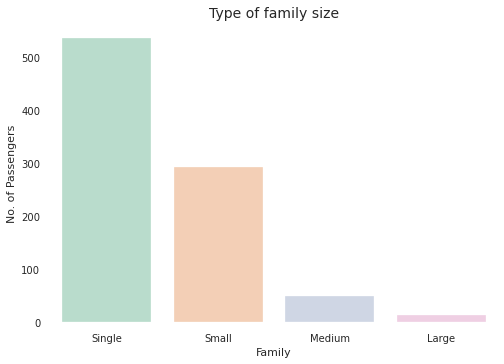

In [46]:
fig,ax = plt.subplots()
univariate_countplot(train,'Family_type','Family',title = 'Type of family size', ax=ax)

Most of the passengers is single onboard without any family member

**Fare**

In [47]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

There are fare with values 0 and 512

In [48]:
train[(train.Fare == train.Fare.min()) |(train.Fare == train.Fare.max())]

PassengerId  Survived  Pclass                                Name  \
179          180         0       3                 Leonard, Mr. Lionel   
258          259         1       1                    Ward, Miss. Anna   
263          264         0       1               Harrison, Mr. William   
271          272         1       3        Tornquist, Mr. William Henry   
277          278         0       2         Parkes, Mr. Francis "Frank"   
302          303         0       3     Johnson, Mr. William Cahoone Jr   
413          414         0       2      Cunningham, Mr. Alfred Fleming   
466          467         0       2               Campbell, Mr. William   
481          482         0       2    Frost, Mr. Anthony Wood "Archie"   
597          598         0       3                 Johnson, Mr. Alfred   
633          634         0       1       Parr, Mr. William Henry Marsh   
674          675         0       2          Watson, Mr. Ennis Hastings   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
732          733         0       2                Knight, Mr. Robert J   
737          738         1       1              Lesurer, Mr. Gustave J   
806          807         0       1              Andrews, Mr. Thomas Jr   
815          816         0       1                    Fry, Mr. Richard   
822          823         0       1     Reuchlin, Jonkheer. John George   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  \
179    male  36.0      0      0      LINE    0.0000          NaN        S   
258  female  35.0      0      0  PC 17755  512.3292          NaN        C   
263    male  40.0      0      0    112059    0.0000          B94        S   
271    male  25.0      0      0      LINE    0.0000          NaN        S   
277    male   NaN      0      0    239853    0.0000          NaN        S   
302    male  19.0      0      0      LINE    0.0000          NaN        S   
413    male   NaN      0      0    239853    0.0000          NaN        S   
466    male   NaN      0      0    239853    0.0000          NaN        S   
481    male   NaN      0      0    239854    0.0000          NaN        S   
597    male  49.0      0      0      LINE    0.0000          NaN        S   
633    male   NaN      0      0    112052    0.0000          NaN        S   
674    male   NaN      0      0    239856    0.0000          NaN        S   
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
732    male   NaN      0      0    239855    0.0000          NaN        S   
737    male  35.0      0      0  PC 17755  512.3292         B101        C   
806    male  39.0      0      0    112050    0.0000          A36        S   
815    male   NaN      0      0    112058    0.0000         B102        S   
822    male  38.0      0      0     19972    0.0000          NaN        S   

    Title  Age_cat  Family Family_type  
179    Mr    Adult       1      Single  
258    Ms    Adult       1      Single  
263    Mr    Adult       1      Single  
271    Mr    Adult       1      Single  
277    Mr  Elderly       1      Single  
302    Mr    Adult       1      Single  
413    Mr  Elderly       1      Single  
466    Mr  Elderly       1      Single  
481    Mr  Elderly       1      Single  
597    Mr    Adult       1      Single  
633    Mr  Elderly       1      Single  
674    Mr  Elderly       1      Single  
679    Mr    Adult       2       Small  
732    Mr  Elderly       1      Single  
737    Mr    Adult       1      Single  
806    Mr    Adult       1      Single  
815    Mr  Elderly       1      Single  
822  Rare    Adult       1      Single

* We can see that for fare 512.3292, all of the class are 1st. 
* for the fare 0, the class occur througout each class, therefore maybe the ticket is FOC, thats why the fare is 0.

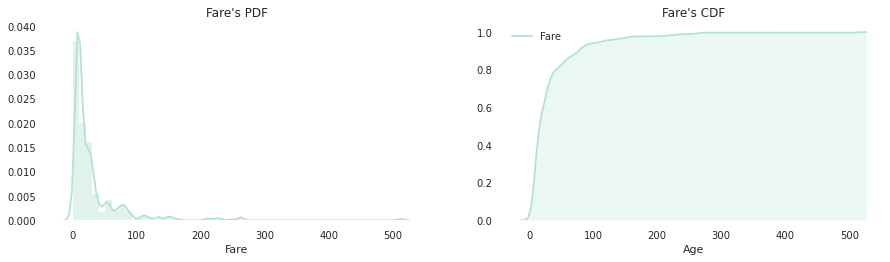

In [49]:
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(221)
sns.distplot(train['Fare'],ax=ax1)
ax1.set(title = 'Fare\'s PDF')

ax2 = fig.add_subplot(222)
sns.kdeplot(train.Fare, cumulative = True, shade = True,ax=ax2)
ax2.set(title = 'Fare\'s CDF',xlabel = 'Age')
plt.legend()


[Text(0.5, 1.0, 'Fare by Ticket Class')]

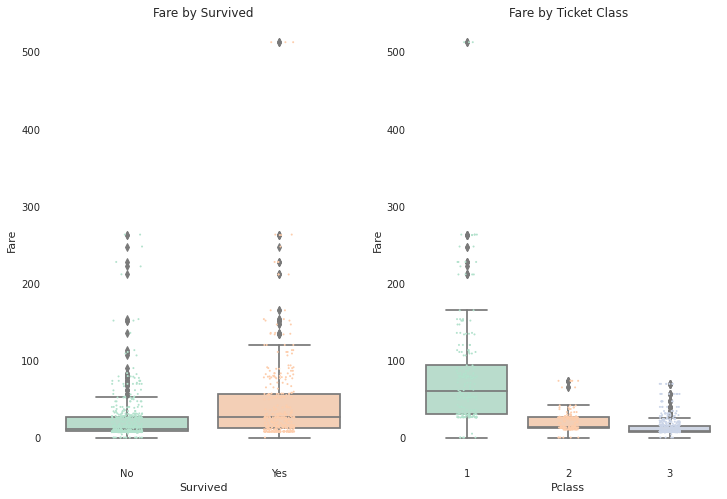

In [50]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(121)
sns.boxplot(data = train, x = 'Survived', y = 'Fare',ax=ax1)
sns.stripplot(data = train, x = 'Survived', y = 'Fare',ax=ax1,size = 2)
ax1.set(title = 'Fare by Survived')
plt.xticks([0,1], labels = ['No','Yes'])

ax2 = fig.add_subplot(122)
sns.boxplot(data = train, x = 'Pclass', y = 'Fare',ax=ax2)
sns.stripplot(data = train, x = 'Pclass', y = 'Fare',ax=ax2,size = 2)
ax2.set(title = 'Fare by Ticket Class')


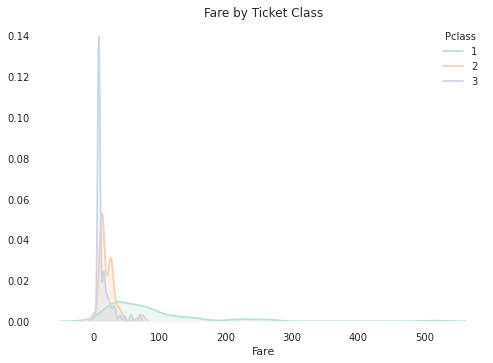

In [51]:
fig,ax = plt.subplots()

sns.kdeplot(train.query('Pclass == 1').Fare, shade = True,ax=ax, label = '1')
sns.kdeplot(train.query('Pclass == 2').Fare, shade = True,ax=ax, label = '2')
sns.kdeplot(train.query('Pclass == 3').Fare, shade = True,ax=ax, label = '3')
ax.set(xlabel = 'Fare', title = 'Fare by Ticket Class')
plt.legend(title = 'Pclass', labels = [1,2,3])

* We can see that most of the fare are around price 0 and 100, which leads to left-skewed.
* It seems that the distribution is came from a log-normal distributions
* Passengers with higher fare are most likely to be survived
* The fare of ticket class 1 are relatively higher
* for fare of class 1 it has wide range from 0 to 500
* for fare of class 3, the fare tend to focus between range 0 to 100.

**Cabin**

In [52]:
train['Cabin_floor'] = train.Cabin.apply(lambda x: list(str(x))[0])
train['Cabin_floor'] = train.Cabin_floor.replace('n', np.nan)

In [53]:
univariate_count('Cabin_floor', True)

Proportion of Cabin_floor :
A    0.073529
B    0.230392
C    0.289216
D    0.161765
E    0.156863
F    0.063725
G    0.019608
T    0.004902
Name: Cabin_floor, dtype: float64


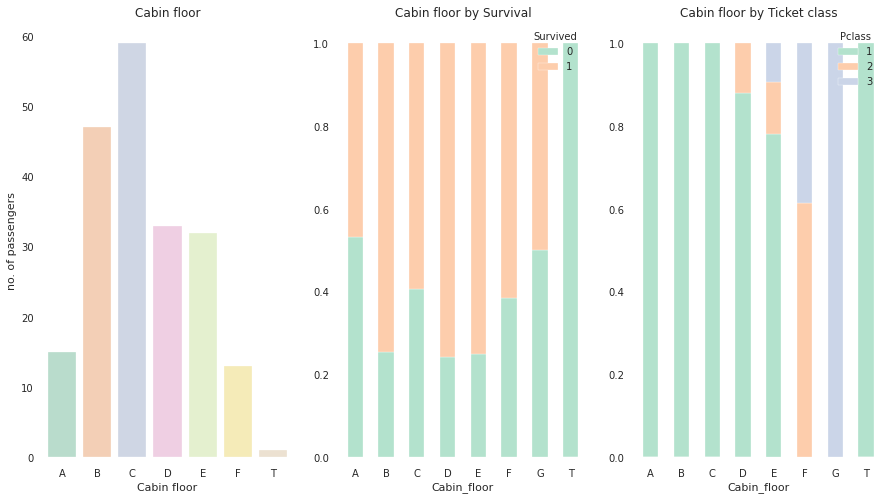

In [54]:
fig = plt.figure(figsize = (15,8))

ax1 = fig.add_subplot(131)
sns.countplot(data = train, x = 'Cabin_floor', order = ['A','B','C','D','E','F','T'],ax=ax1)
ax1.set(title = 'Cabin floor', xlabel = 'Cabin floor', ylabel = 'no. of passengers')

ax2 = fig.add_subplot(132)
train.groupby('Cabin_floor')['Survived'].value_counts(normalize = True).unstack().plot(kind = 'bar', stacked = True,ax=ax2)
ax2.set(title = 'Cabin floor by Survival')
plt.xticks(rotation = False)
plt.legend(loc = 'upper right', title = 'Survived')

ax3 = fig.add_subplot(133)
train.groupby('Cabin_floor')['Pclass'].value_counts(normalize = True).unstack().plot(kind = 'bar', stacked = True,ax=ax3)
ax3.set(title = 'Cabin floor by Ticket class')
plt.xticks(rotation = False)
plt.legend(loc = 'upper right', title = 'Pclass')

* C's cabin has the most passengers (29%)
* Cabin A,B,C are for passengers class 1
* Passengers from Cabin B,D,E are more likely to survived

**Embarked**
*  C = Cherbourg
*  Q = Queenstown
*  S = Southampton

In [55]:
univariate_count('Embarked', True)

Proportion of Embarked :
C    0.188976
Q    0.086614
S    0.724409
Name: Embarked, dtype: float64


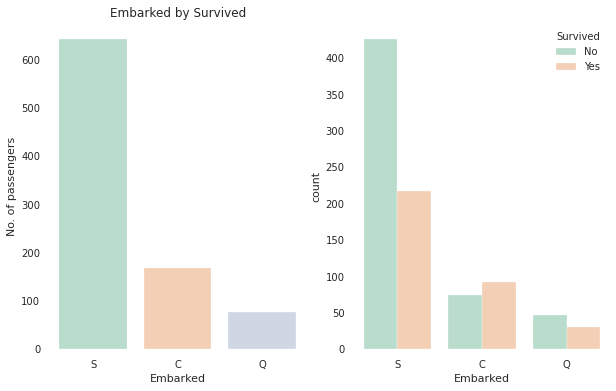

In [56]:
fig = plt.figure(figsize = (10,6))

ax1 = fig.add_subplot(121)
sns.countplot(data = train, x = 'Embarked',ax=ax1)
ax1.set(xlabel = 'Embarked', ylabel = 'No. of passengers', title = 'Embarked')

ax2 = fig.add_subplot(122)
sns.countplot(data = train, x = 'Embarked',hue = 'Survived',ax=ax2)
ax1.set(xlabel = 'Embarked', ylabel = 'No. of passengers', title = 'Embarked by Survived')
plt.legend(title = 'Survived', labels = ['No', 'Yes'])

Most of the passengers will stop at Southampton (72%)

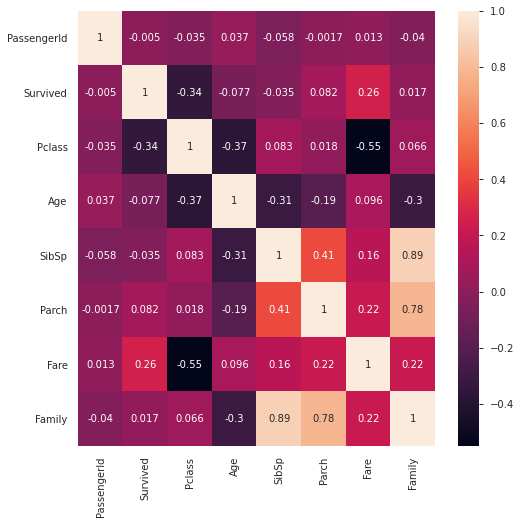

In [57]:
fig,ax = plt.subplots(figsize = (8,8))
sns.heatmap(train.corr(),annot = True,ax=ax)

# Summary :

	•	Most of the passengers did not survive in the tragedy
	•	Survival rate is 38.3% 
	•	Most of the passengers holding ticket class 3 ( >= 500 passengers )
	•	Passenger with ticket class 1 has the highest survival rate ( 63%) while ticket class 3 has the highest death rate ( 75.8%)
	•	Female and male in ticket class 3 has the highest survival rate ( 96.8% , 63%)
	•	Most of the passenger are with title Mr or Ms
	•	Most of the passengers are going to embarked at Southampton
	•	Passengers with special title are likely to survived
	•	Most of the passengers are Male 
	•	Female are more likely to survived ( 74.2% )
	•	Age are most likely came from normal distribution
	•	Most of the passengers are Adult 
	•	The age of male are higher than female
	•	Most of the passengers did not have siblings and spouse onboard
	•	Most of the passengers did not have parent and children onboard
	•	Fare are most likey came from a lognormal distribution
	•	Passengers with higher fare are most likely to be survived
	•	Most of the passengers are in Cabin C 

# Explore missing data

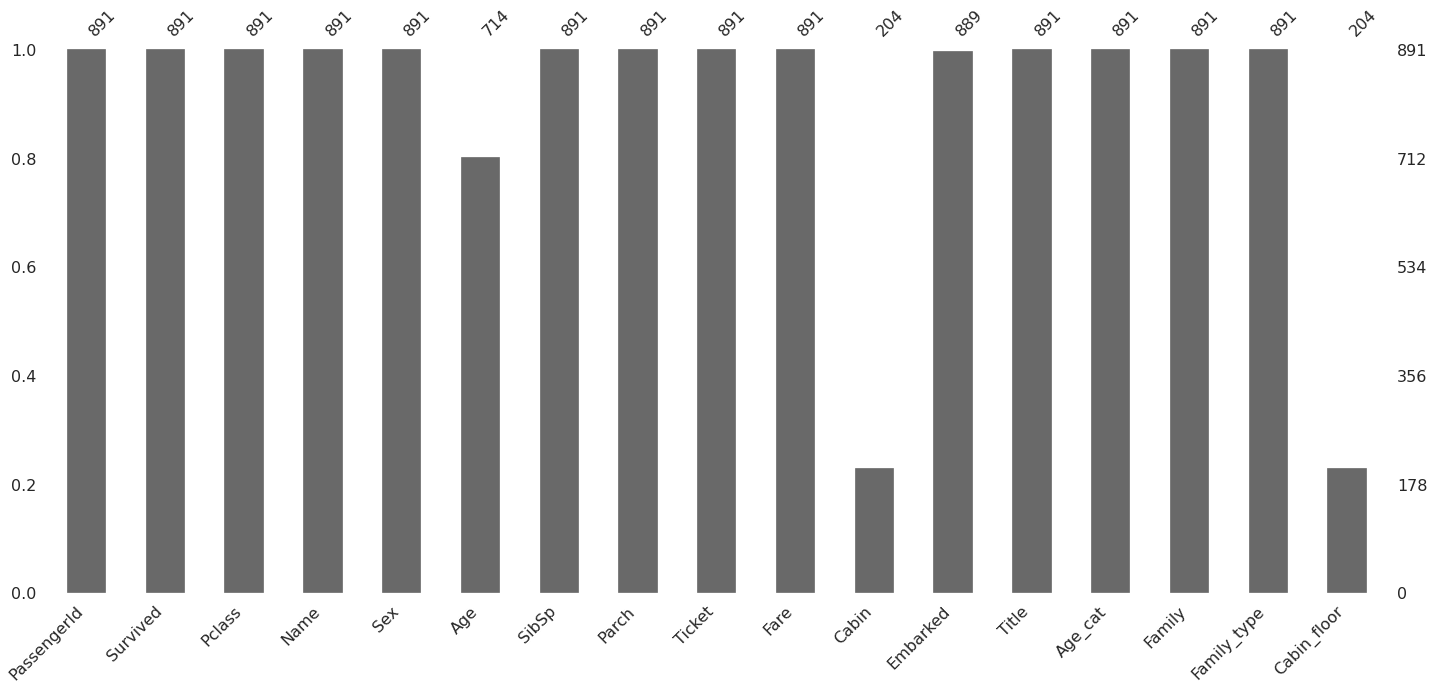

In [58]:
import missingno as msno
msno.bar(train)

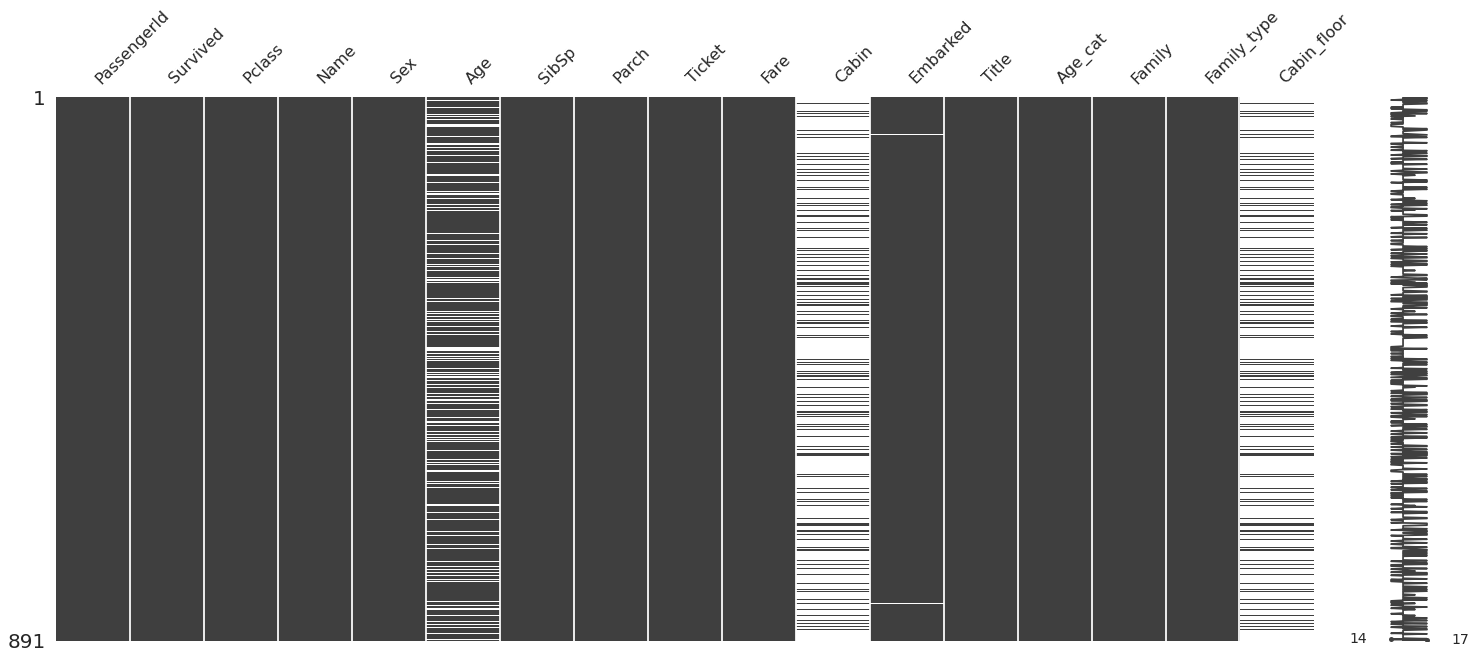

In [59]:
msno.matrix(train)

# Impute missing values

In [60]:
train.Age.fillna(train.Age.median(), inplace = True)
train.Cabin_floor.fillna(train.Cabin_floor.mode().values[0], inplace= True)

train.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis = 1, inplace = True)

train.isna().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Title          0
Age_cat        0
Family         0
Family_type    0
Cabin_floor    0
dtype: int64

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Sex          891 non-null    object  
 3   Age          891 non-null    float64 
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Fare         891 non-null    float64 
 7   Embarked     889 non-null    object  
 8   Title        891 non-null    object  
 9   Age_cat      891 non-null    object  
 10  Family       891 non-null    int64   
 11  Family_type  891 non-null    category
 12  Cabin_floor  891 non-null    object  
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


# Outlier

**Age and Fare's boxplot before outlier treatment**

[Text(0.5, 1.0, 'Fare')]

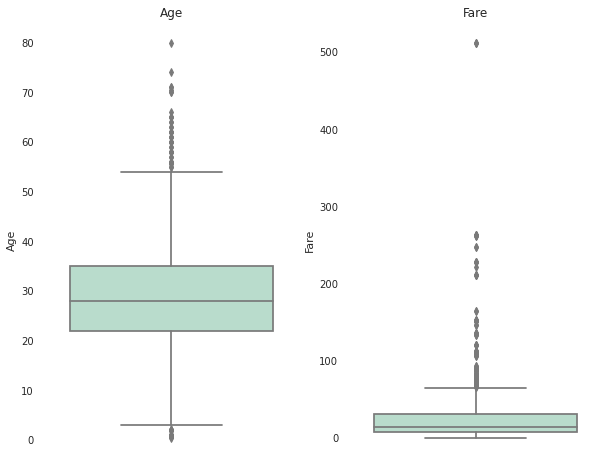

In [62]:
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(121)
sns.boxplot(data = train, y = 'Age',ax=ax1)
ax1.set( title = 'Age')

ax2 = fig.add_subplot(122)
sns.boxplot(data = train, y = 'Fare',ax=ax2)
ax2.set( title = 'Fare')

In [63]:
# Age, Fare
# use IQR approach
Q1_age = train.Age.quantile(0.25)
Q3_age = train.Age.quantile(0.75)
IQR_age = Q3_age - Q1_age

train = train[~((train.Age < (Q1_age - 1.5 * IQR_age)) | (train.Age > (Q3_age + 1.5 * IQR_age )))]

Q1_fare = train.Fare.quantile(0.25)
Q3_fare= train.Fare.quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

train = train[~((train.Fare < (Q1_fare - 1.5 * IQR_fare)) | (train.Fare > (Q3_fare + 1.5 * IQR_fare )))]

**Age and Fare's boxplot after outlier treatment**

[Text(0.5, 1.0, 'Fare')]

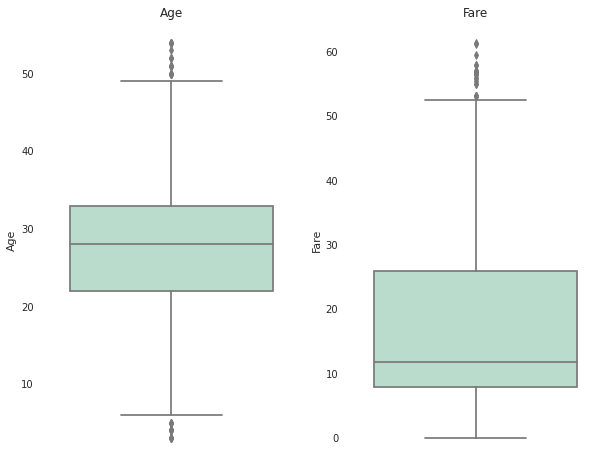

In [64]:
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(121)
sns.boxplot(data = train, y = 'Age',ax=ax1)
ax1.set( title = 'Age')

ax2 = fig.add_subplot(122)
sns.boxplot(data = train, y = 'Fare',ax=ax2)
ax2.set( title = 'Fare')

# Feature engineer

In [65]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in train.select_dtypes('object').columns:
    train[col] = encoder.fit_transform(train[col])

**Drop columns not used in modelling**
* SibSp and Parch and Family_type because repetitive due to exists of family
* Age because exits of Age_cat
* Cabin floor and because less helpful

In [66]:
y = train['Survived']
X = train.drop(['Survived','SibSp','Parch','Age','Family','Cabin_floor'],axis = 1)

print('Feature\'s shape : {}'.format(X.shape))
print('Target\'s shape : {}'.format(y.shape))

Feature's shape : (718, 7)
Target's shape : (718,)


In [67]:
X.Family_type = encoder.fit_transform(X.Family_type)

# Modelling

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import xgboost as xgb

seed = 225

model_result = dict()

**KNN**

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    0.6s finished


Best params : {'KNN__n_neighbors': 4}
Best score : 0.84
KNN's train score : 0.869
KNN's test score : 0.764
[[127   7]
 [ 44  38]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       134
           1       0.84      0.46      0.60        82

    accuracy                           0.76       216
   macro avg       0.79      0.71      0.72       216
weighted avg       0.78      0.76      0.74       216

KNN's roc score : 0.706


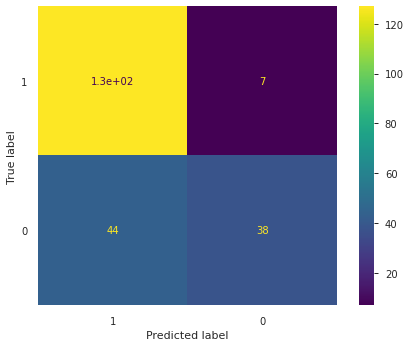

In [69]:
steps = [('Scaler', StandardScaler()), ('KNN', KNN())]
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)

params = {'KNN__n_neighbors': np.arange(1,20)}
knn_cv = GridSearchCV(pipeline,params, cv = 5, verbose = 1, n_jobs = -1 )

knn_cv.fit(X_train,y_train)

print('Best params : {}'.format(knn_cv.best_params_))
print('Best score : {:.2f}'.format(knn_cv.best_score_))

y_pred_train = knn_cv.predict(X_train)
y_pred_test = knn_cv.predict(X_test)

print('KNN\'s train score : {:.3f}'.format(accuracy_score(y_train,y_pred_train)))
print('KNN\'s test score : {:.3f}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print('KNN\'s roc score : {:.3f}'.format(roc_auc_score(y_test,y_pred_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test),[1,0]).plot()

model_result['KNN'] = accuracy_score(y_test,y_pred_test)

**Logistic regression**

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished


Best params : {'LR__C': 0.1}
Best score : 0.81
LR's train score : 0.829
LR's test score : 0.759
[[120  14]
 [ 38  44]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       134
           1       0.76      0.54      0.63        82

    accuracy                           0.76       216
   macro avg       0.76      0.72      0.73       216
weighted avg       0.76      0.76      0.75       216

LR's roc score : 0.716


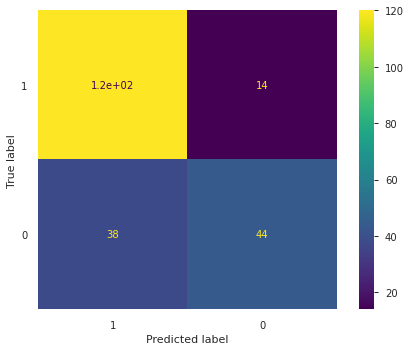

In [70]:
steps = [('Scaler', StandardScaler()), ('LR', LogisticRegression(random_state = seed))]
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)

params = {'LR__C': [0.001,0.01,0.1,1,10,100,1000]}

lr_cv = GridSearchCV(pipeline,params, cv = 5, verbose = 1, n_jobs = -1 )

lr_cv.fit(X_train,y_train)

print('Best params : {}'.format(lr_cv.best_params_))
print('Best score : {:.2f}'.format(lr_cv.best_score_))

y_pred_train = lr_cv.predict(X_train)
y_pred_test = lr_cv.predict(X_test)

print('LR\'s train score : {:.3f}'.format(accuracy_score(y_train,y_pred_train)))
print('LR\'s test score : {:.3f}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print('LR\'s roc score : {:.3f}'.format(roc_auc_score(y_test,y_pred_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test),[1,0]).plot()

model_result['LR'] = accuracy_score(y_test,y_pred_test)

**Random Forest**

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   21.5s finished


Best params : {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
Best score : 0.82
RF's train score : 0.936
RF's test score : 0.801
[[125   9]
 [ 34  48]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       134
           1       0.84      0.59      0.69        82

    accuracy                           0.80       216
   macro avg       0.81      0.76      0.77       216
weighted avg       0.81      0.80      0.79       216

RF's roc score : 0.759


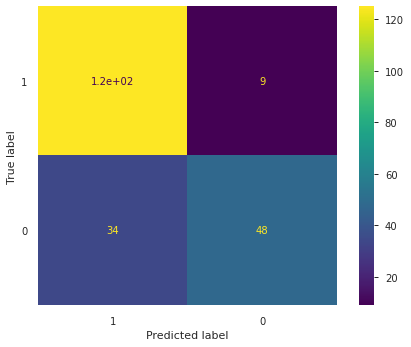

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)

rf = RandomForestClassifier(random_state = seed)
params = {'n_estimators' : [200,300,400], 'max_depth':[10,12,14], 'max_features':['auto','sqrt','log2']}

rf_cv = GridSearchCV(rf,params, cv = 3, verbose = 1, n_jobs = -1 )

rf_cv.fit(X_train,y_train)

print('Best params : {}'.format(rf_cv.best_params_))
print('Best score : {:.2f}'.format(rf_cv.best_score_))

y_pred_train = rf_cv.predict(X_train)
y_pred_test = rf_cv.predict(X_test)

print('RF\'s train score : {:.3f}'.format(accuracy_score(y_train,y_pred_train)))
print('RF\'s test score : {:.3f}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print('RF\'s roc score : {:.3f}'.format(roc_auc_score(y_test,y_pred_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test),[1,0]).plot()

model_result['RF'] = accuracy_score(y_test,y_pred_test)

**SVC**

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 151 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    1.4s finished


Best params : {'SVC__C': 100, 'SVC__gamma': 0.01}
Best score : 0.83
SVC's train score : 0.853
SVC's test score : 0.769
[[126   8]
 [ 42  40]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       134
           1       0.83      0.49      0.62        82

    accuracy                           0.77       216
   macro avg       0.79      0.71      0.72       216
weighted avg       0.78      0.77      0.75       216

SVC's roc score : 0.714


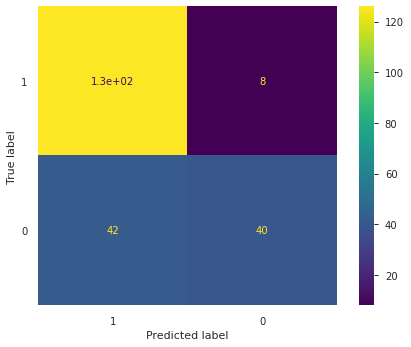

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)

steps = [('Scaler', StandardScaler()), ('SVC', SVC(random_state = seed))]
pipeline = Pipeline(steps)


parameters = {'SVC__C':[0.1, 1, 10,100, 1000], 'SVC__gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1,1,10]}
searcher = GridSearchCV(pipeline, parameters, cv = 5, n_jobs = -1, verbose = 1)

searcher.fit(X_train,y_train)

print('Best params : {}'.format(searcher.best_params_))
print('Best score : {:.2f}'.format(searcher.best_score_))

y_pred_train = searcher.predict(X_train)
y_pred_test = searcher.predict(X_test)

print('SVC\'s train score : {:.3f}'.format(accuracy_score(y_train,y_pred_train)))
print('SVC\'s test score : {:.3f}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print('SVC\'s roc score : {:.3f}'.format(roc_auc_score(y_test,y_pred_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test),[1,0]).plot()

model_result['SVC'] = accuracy_score(y_test,y_pred_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


Best params : {'LinearSVC__C': 1, 'LinearSVC__loss': 'squared_hinge', 'LinearSVC__penalty': 'l2'}
Best score : 0.81
LinearSVC's train score : 0.817
LinearSVC's test score : 0.759
[[114  20]
 [ 32  50]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       134
           1       0.71      0.61      0.66        82

    accuracy                           0.76       216
   macro avg       0.75      0.73      0.74       216
weighted avg       0.76      0.76      0.75       216

LinearSVC's roc score : 0.730


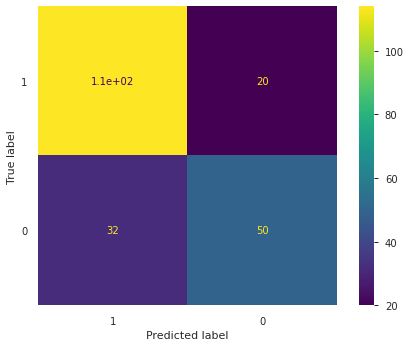

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)

steps = [('Scaler', StandardScaler()), ('LinearSVC', LinearSVC(random_state = seed))]
pipeline = Pipeline(steps)


parameters = {'LinearSVC__C':[0.1, 1, 10,100, 1000], 'LinearSVC__penalty':['l1','l2'], 'LinearSVC__loss' : ['hinge', 'squared_hinge']}
searcher = GridSearchCV(pipeline, parameters, cv = 5, n_jobs = -1, verbose = 1)

searcher.fit(X_train,y_train)

print('Best params : {}'.format(searcher.best_params_))
print('Best score : {:.2f}'.format(searcher.best_score_))

y_pred_train = searcher.predict(X_train)
y_pred_test = searcher.predict(X_test)

print('LinearSVC\'s train score : {:.3f}'.format(accuracy_score(y_train,y_pred_train)))
print('LinearSVC\'s test score : {:.3f}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print('LinearSVC\'s roc score : {:.3f}'.format(roc_auc_score(y_test,y_pred_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test),[1,0]).plot()

model_result['LinearSVC'] = accuracy_score(y_test,y_pred_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.7s finished


Best params : {'SGD__alpha': 0.001, 'SGD__loss': 'log', 'SGD__penalty': 'l1'}
Best score : 0.82
SGD's train score : 0.803
SGD's test score : 0.745
[[111  23]
 [ 32  50]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       134
           1       0.68      0.61      0.65        82

    accuracy                           0.75       216
   macro avg       0.73      0.72      0.72       216
weighted avg       0.74      0.75      0.74       216

SGD's roc score : 0.719


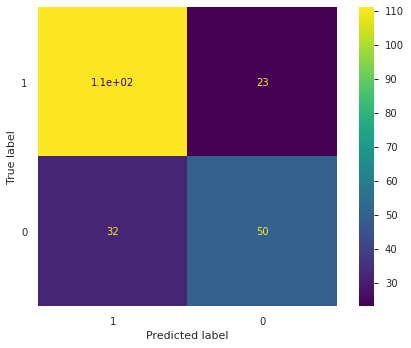

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)

steps = [('Scaler', StandardScaler()), ('SGD', SGDClassifier(random_state = seed))]
pipeline = Pipeline(steps)


parameters = {'SGD__alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'SGD__loss':['hinge', 'log'], 'SGD__penalty':['l1', 'l2']}
searcher = GridSearchCV(pipeline, parameters, cv = 5, n_jobs = -1, verbose = 1)

searcher.fit(X_train,y_train)

print('Best params : {}'.format(searcher.best_params_))
print('Best score : {:.2f}'.format(searcher.best_score_))

y_pred_train = searcher.predict(X_train)
y_pred_test = searcher.predict(X_test)

print('SGD\'s train score : {:.3f}'.format(accuracy_score(y_train,y_pred_train)))
print('SGD\'s test score : {:.3f}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print('SGD\'s roc score : {:.3f}'.format(roc_auc_score(y_test,y_pred_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test),[1,0]).plot()

model_result['SGD'] = accuracy_score(y_test,y_pred_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   18.1s finished


Best params : {'learning_rate': 0.2, 'n_estimators': 300}
Best score : 0.82
Adaboost's train score : 0.938
Adaboost's test score : 0.787
[[124  10]
 [ 36  46]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.84       134
           1       0.82      0.56      0.67        82

    accuracy                           0.79       216
   macro avg       0.80      0.74      0.76       216
weighted avg       0.79      0.79      0.78       216

Adaboost's roc score : 0.743


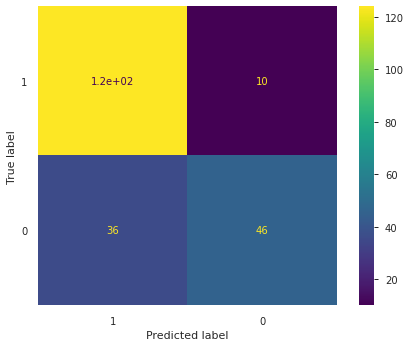

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)

dt = DecisionTreeClassifier(max_depth = 4,random_state = seed)
ada = AdaBoostClassifier(dt,random_state = seed)

params = {'n_estimators' : [200,300,400], 'learning_rate' : [0.1,0.2,0.4,1]}

searcher = GridSearchCV(ada,params, cv = 5, verbose = 1, n_jobs = -1 )

searcher.fit(X_train,y_train)

print('Best params : {}'.format(searcher.best_params_))
print('Best score : {:.2f}'.format(searcher.best_score_))
y_pred_train = searcher.predict(X_train)
y_pred_test = searcher.predict(X_test)

print('Adaboost\'s train score : {:.3f}'.format(accuracy_score(y_train,y_pred_train)))
print('Adaboost\'s test score : {:.3f}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print('Adaboost\'s roc score : {:.3f}'.format(roc_auc_score(y_test,y_pred_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test),[1,0]).plot()

model_result['Adaboost'] = accuracy_score(y_test,y_pred_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   19.1s finished


Best params : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
Best score : 0.85
Gradient Boosting's train score : 0.912
Gradient Boosting's test score : 0.810
[[122  12]
 [ 29  53]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       134
           1       0.82      0.65      0.72        82

    accuracy                           0.81       216
   macro avg       0.81      0.78      0.79       216
weighted avg       0.81      0.81      0.80       216

Gradient Boosting's roc score : 0.778


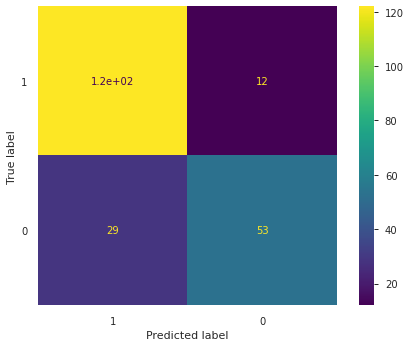

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)

gb = GradientBoostingClassifier(random_state = seed, subsample = 0.8)

params = {'learning_rate' : [0.1,0.2], 'n_estimators' : [200,300,400],'max_depth' : [2,3,4,6]}

searcher = GridSearchCV(gb,params, cv = 5, verbose = 1, n_jobs = -1 )

searcher.fit(X_train,y_train)

print('Best params : {}'.format(searcher.best_params_))
print('Best score : {:.2f}'.format(searcher.best_score_))

y_pred_train = searcher.predict(X_train)
y_pred_test = searcher.predict(X_test)

print('Gradient Boosting\'s train score : {:.3f}'.format(accuracy_score(y_train,y_pred_train)))
print('Gradient Boosting\'s test score : {:.3f}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print('Gradient Boosting\'s roc score : {:.3f}'.format(roc_auc_score(y_test,y_pred_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test),[1,0]).plot()

model_result['Gradient Boosting'] = accuracy_score(y_test,y_pred_test)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.7s finished


Best params : {'XG__gamma': 1, 'XG__learning_rate': 0.1, 'XG__max_depth': 6}
Best score : 0.86
XGBoost's train score : 0.898
XGBoost's test score : 0.782
[[123  11]
 [ 36  46]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       134
           1       0.81      0.56      0.66        82

    accuracy                           0.78       216
   macro avg       0.79      0.74      0.75       216
weighted avg       0.79      0.78      0.77       216

XGBoost's roc score : 0.739


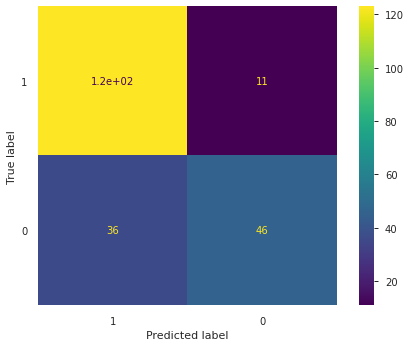

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)

steps = [('Scaler', StandardScaler()), ('XG', xgb.XGBClassifier(random_state = seed))]
pipeline = Pipeline(steps)

params = {'XG__learning_rate' : [0.1,0.2,0.4], 'XG__gamma' : [0.0001,0.001,0.01,1,10],'XG__max_depth' : [2,3,4,6]}

searcher = GridSearchCV(pipeline,params, cv = 5, verbose = 1, n_jobs = -1 )

searcher.fit(X_train,y_train)

print('Best params : {}'.format(searcher.best_params_))
print('Best score : {:.2f}'.format(searcher.best_score_))

y_pred_train = searcher.predict(X_train)
y_pred_test = searcher.predict(X_test)

print('XGBoost\'s train score : {:.3f}'.format(accuracy_score(y_train,y_pred_train)))
print('XGBoost\'s test score : {:.3f}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print('XGBoost\'s roc score : {:.3f}'.format(roc_auc_score(y_test,y_pred_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test),[1,0]).plot()

model_result['XGBoost'] = accuracy_score(y_test,y_pred_test)

In [78]:
print(model_result)

{'KNN': 0.7638888888888888, 'LR': 0.7592592592592593, 'RF': 0.8009259259259259, 'SVC': 0.7685185185185185, 'LinearSVC': 0.7592592592592593, 'SGD': 0.7453703703703703, 'Adaboost': 0.7870370370370371, 'Gradient Boosting': 0.8101851851851852, 'XGBoost': 0.7824074074074074}


In [79]:
# Voting Classifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)

lr_pipeline = Pipeline([('scale', StandardScaler()), ('LR',LogisticRegression(random_state=seed, C = 1))])

sgd = SGDClassifier(alpha = 0.01, loss = 'hinge', penalty = 'l2', random_state = seed)

gb = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 2, n_estimators = 200, random_state = seed, subsample = 0.8)

xg = xgb.XGBClassifier(random_state = seed, gamma = 0.01, learning_rate = 0.2, max_depth = 3)

classifiers = [('Logistic Regression', lr_pipeline), ('SGD', sgd), ('Gradient Boosting', gb), ('XGBoost',xg)]

for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Logistic Regression : 0.750
SGD : 0.755
Gradient Boosting : 0.810
XGBoost : 0.782
Voting Classifier: 0.750
